In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape #records: 5440, fields: 6

(5440, 6)

In [4]:
df.head() 

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [5]:
#4 fields are categorical & 2 are numerical
#We need to do preprocessing in order to make the categorical data worthy of the analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [7]:
#There is only one empty record in "author" column

In [8]:
null_data = df[df.isnull().any(axis=1)]
print(null_data)

                   title author           date  views  likes  \
3039  Year In Ideas 2015    NaN  December 2015    532     15   

                                          link  
3039  https://ted.com/talks/year_in_ideas_2015  


### Dealing with missing value 

In [9]:
#deleting the missing value 
df = df.dropna(axis=0)

In [10]:
df.shape

(5439, 6)

In [11]:
author_count = df["author"].value_counts()
author_count

Alex Gendler        45
Iseult Gillespie    33
Matt Walker         18
Alex Rosenthal      15
Elizabeth Cox       13
                    ..
Dayo Ogunyemi        1
Jon Bowers           1
Kevin Briggs         1
John Bolton          1
Hu Liang             1
Name: author, Length: 4443, dtype: int64

In [12]:
#Author "Alex Gendler" is the most popular ted talks speaker in terms of number of talks

In [84]:
#Alternate way
df.groupby("author").size().sort_values(ascending=False).head()

author
Alex Gendler        45
Iseult Gillespie    33
Matt Walker         18
Alex Rosenthal      15
Elizabeth Cox       13
dtype: int64

In [13]:
title_count = df["title"].value_counts()
title_count

Why wildfires have gotten worse — and what we can do about it             1
Creative problem-solving in the face of extreme limits                    1
How quantum mechanics explains global warming                             1
Why sneakers are a great investment                                       1
Why we need to imagine different futures                                  1
                                                                         ..
The riddle of experience vs. memory                                       1
How we can store digital data in DNA                                      1
The world's most painful insect sting                                     1
4 lessons I learned from taking a stand against drugs and gun violence    1
To create for the ages, let's combine art and engineering                 1
Name: title, Length: 5439, dtype: int64

In [14]:
#There are no repeated titles

### Uivariate analysis

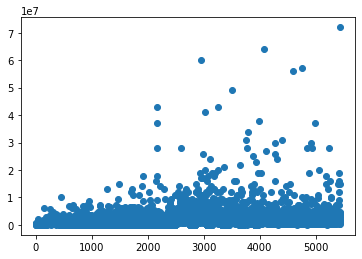

In [15]:
plt.scatter(df.index, df["views"])

<AxesSubplot:ylabel='views'>

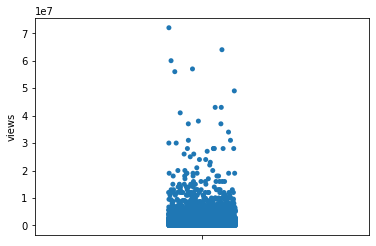

In [18]:
#for better understanding, let's look at the distribution of data "views"
sns.stripplot(y=df["views"])

/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of views')

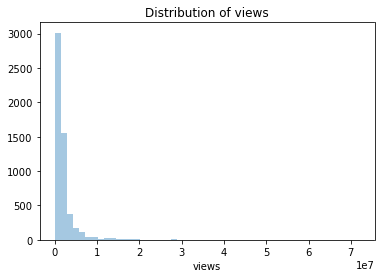

In [19]:
sns.distplot(df["views"], kde=False)
plt.title("Distribution of views")

In [20]:
#The above graphs show that there are some outliers

In [22]:
#10 largest data for views field
print(df["views"].nlargest(10))

5436    72000000
4084    64000000
2958    60000000
4765    57000000
4605    56000000
3504    49000000
2168    43000000
3251    43000000
3017    41000000
3994    38000000
Name: views, dtype: int64


In [23]:
count_less_1e7 = np.count_nonzero(df["views"] < 10000000)

In [24]:
print(count_less_1e7)

5312


In [25]:
np.count_nonzero(df["views"] > 10000000)

117

In [26]:
np.count_nonzero(df["views"] > 20000000)

32

In [55]:
max_views = df[df["views"]==72000000]
max_views

,title,author,date,views,likes,link
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...


In [56]:
#The ted talks with the most views is: Do school kills creativity?

In [86]:
df.groupby("author").sum()["views"].sort_values(ascending=False)

author
Alex Gendler                        187196000
Sir Ken Robinson                     95654000
Bill Gates                           77800000
Simon Sinek                          74800000
Brené Brown                          72000000
                                      ...    
Peggy Chan                               2100
Dave Matthews                            1600
Qi Wu 吴琪                                 1500
 Deutsche Philharmonie Merck             1300
Findlay Napier and Gillian Frame         1300
Name: views, Length: 4443, dtype: int64

In [87]:
#The author with the most views is Alex Gendler

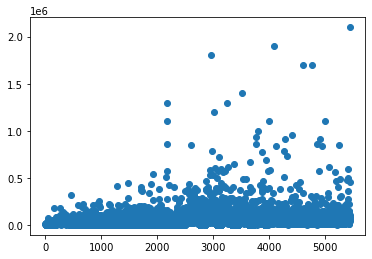

In [27]:
plt.scatter(df.index, df["likes"])

In [28]:
#Most of the data of likes is between 0.0-0.5 1e6

In [32]:
np.count_nonzero(df["likes"] < 500000)

5386

In [33]:
np.count_nonzero(df["likes"] > 500000)

53

In [39]:
#likes data also have some potential outliers

In [57]:
#date
df["date"]

0        December 2021
1        February 2022
2       September 2021
3         October 2021
4         October 2021
             ...      
5435     February 2006
5436     February 2006
5437     February 2006
5438     February 2006
5439     February 2006
Name: date, Length: 5439, dtype: object

In [58]:
#month, year
df["date_split"] = df["date"].str.split(" ")
df["date_split"]
df["month"] = df["date_split"].str[0]
df["year"] = df["date_split"].str[1]

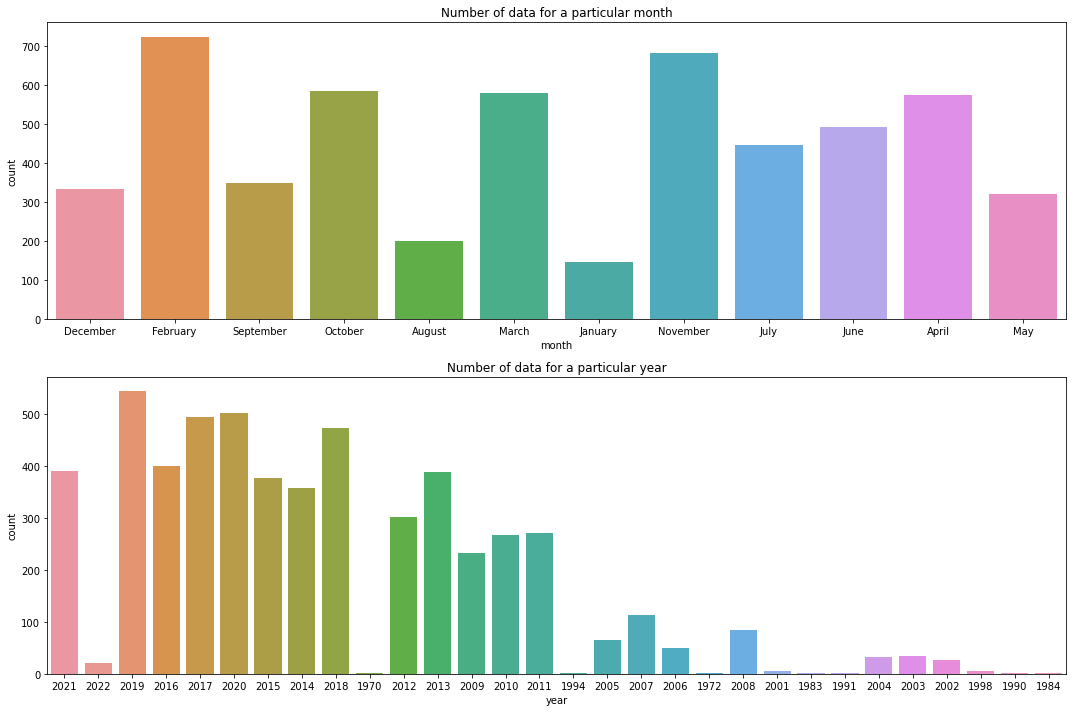

In [59]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,10))

sns.countplot(x='month',data=df,ax=ax[0])
ax[0].set_title('Number of data for a particular month')

sns.countplot(x='year',data=df,ax=ax[1])
ax[1].set_title('Number of data for a particular year')

plt.tight_layout()

In [60]:
#According to the 2 graphs, most ted talks were released in the month of feburary and in the year of 2019

### Bivariate Analysis

Text(0.5, 1.0, 'The Average views per month')

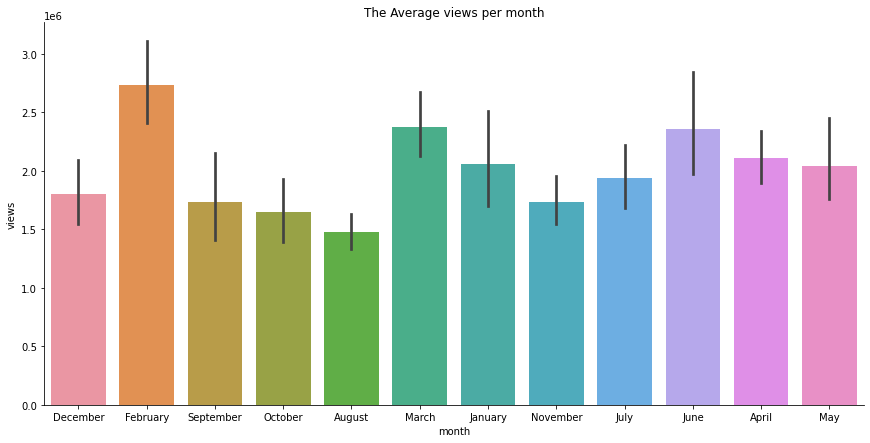

In [61]:
sns.catplot(x="month",y="views",kind="bar",data=df,height=6,aspect=2)
plt.title('The Average views per month')

In [62]:
#most viewed ted talk was in the month of feb

Text(0.5, 1.0, 'The Average views per year')

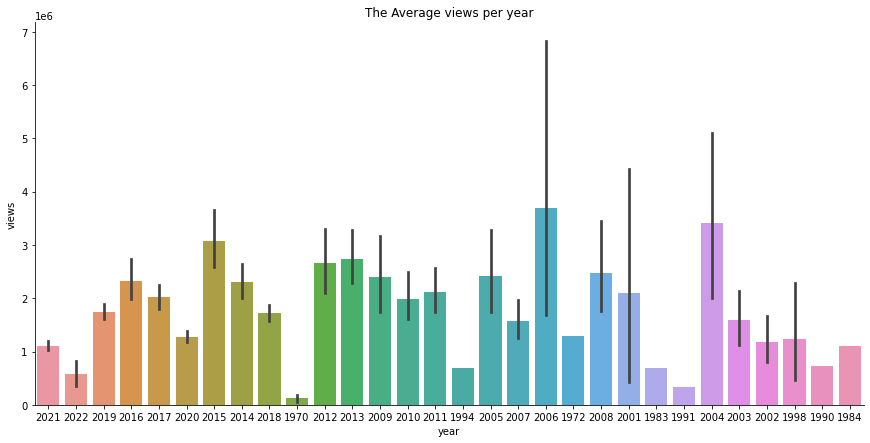

In [63]:
sns.catplot(x="year",y="views",kind="bar",data=df,height=6,aspect=2)
plt.title('The Average views per year')

In [64]:
#most viewed ted talk was in the year of 2006 even though most released ted talks were in 2019

Text(0.5, 1.0, 'The Average likes per month')

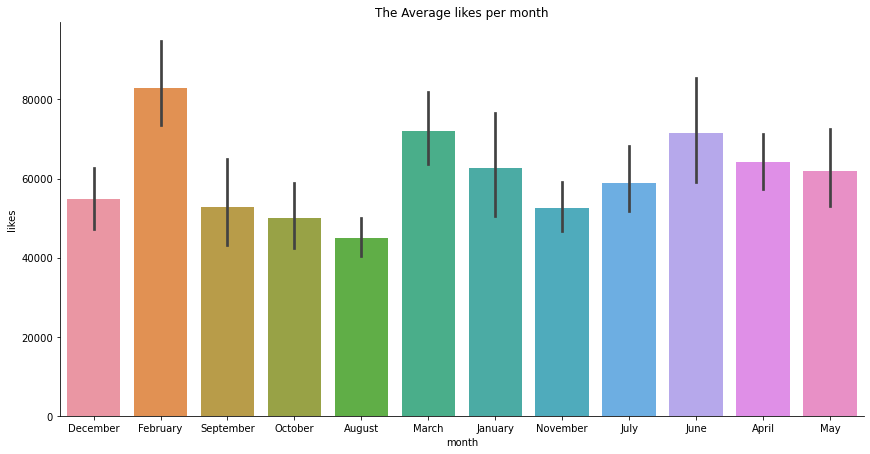

In [66]:
sns.catplot(x="month",y="likes",kind="bar",data=df,height=6,aspect=2)
plt.title('The Average likes per month')

In [68]:
#most liked ted talk was in the month of feb

Text(0.5, 1.0, 'The Average likes per year')

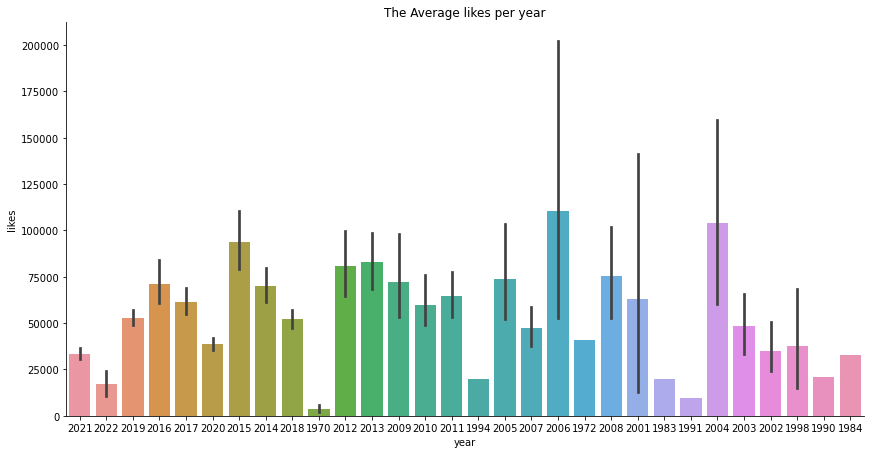

In [67]:
sns.catplot(x="year",y="likes",kind="bar",data=df,height=6,aspect=2)
plt.title('The Average likes per year')

In [69]:
#most liked ted talk was in the year of 2006 even though most released ted talks were in 2019

In [70]:
#ted talks with best view to like ratio
data = df.values

In [75]:
data[0][0]

'Climate action needs new frontline leadership'

In [77]:
ratio = []
for i in range(len(data)):
    ratio.append(data[i][3]/ data[i][4])
df["ratio"] = ratio

In [78]:
df["ratio"]

0       33.666667
1       33.437500
2       34.333333
3       35.583333
4       33.333333
          ...    
5435    32.751092
5436    34.285714
5437    32.954545
5438    33.333333
5439    33.027523
Name: ratio, Length: 5439, dtype: float64

In [79]:
df.sort_values(by="ratio", ascending=False).head()

,title,author,date,views,likes,link,date_split,month,year,ratio
955,A camera that can see around corners,David Lindell,November 2019,364000,10000,https://ted.com/talks/david_lindell_a_camera_t...,"[November, 2019]",November,2019,36.4
905,What's the point(e) of ballet?,Ming Luke,April 2020,364000,10000,https://ted.com/talks/ming_luke_what_s_the_poi...,"[April, 2020]",April,2020,36.4
837,How to see more and care less: The art of Geor...,Iseult Gillespie,June 2020,364000,10000,https://ted.com/talks/iseult_gillespie_how_to_...,"[June, 2020]",June,2020,36.4
26,Can you outsmart the fallacy that divided a na...,Elizabeth Cox,February 2022,363000,10000,https://ted.com/talks/elizabeth_cox_can_you_ou...,"[February, 2022]",February,2022,36.3
1016,The function and fashion of eyeglasses,Debbie Millman,January 2020,363000,10000,https://ted.com/talks/debbie_millman_the_funct...,"[January, 2020]",January,2020,36.3


In [80]:
#So 'A camera that can see around corners' is the best ted talks according to the views to likes ratio

In [89]:
tag = "space"
for i in range(len(data)):
    if tag in data[i][0].lower():
        print(data[i][0], data[i][5])

How film captures the space between hope and despair https://ted.com/talks/mounia_akl_how_film_captures_the_space_between_hope_and_despair
Yes, scientists are actually building an elevator to space https://ted.com/talks/fabio_pacucci_yes_scientists_are_actually_building_an_elevator_to_space
Documentary films that explore trauma — and make space for healing https://ted.com/talks/almudena_toral_documentary_films_that_explore_trauma_and_make_space_for_healing
What should humans take to space (and leave behind)? https://ted.com/talks/jorge_manes_rubio_what_should_humans_take_to_space_and_leave_behind
Playful, wondrous public spaces built for community and possibility https://ted.com/talks/matthew_mazzotta_playful_wondrous_public_spaces_built_for_community_and_possibility
A NASA astronaut's lessons on fear, confidence and preparing for spaceflight https://ted.com/talks/megan_mcarthur_a_nasa_astronaut_s_lessons_on_fear_confidence_and_preparing_for_spaceflight
The Power of Spaces https://ted.

### Data Preprocessing


In [90]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Label encoder takes no arguments
le_title = le.fit_transform(df[["title"]])
le_title

/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1062, 3541, 1955, ..., 1449, 3172,  839])

In [91]:
df1_title = df["title"] 
df1_title
df["title"] = le_title
df["title"]

0       1062
1       3541
2       1955
3       5156
4       1045
        ... 
5435    3435
5436    1217
5437    1449
5438    3172
5439     839
Name: title, Length: 5439, dtype: int64

In [92]:
#Label Encoding for author column
le = LabelEncoder()
le_author = le.fit_transform(df["author"])
le_author

array([3249, 4057, 2805, ..., 2693, 1087,  111])

In [93]:
df1_author = df["author"]
df1_author
df["author"] = le_author
df["author"]

0       3249
1       4057
2       2805
3       1851
4       2686
        ... 
5435    1655
5436    3902
5437    2693
5438    1087
5439     111
Name: author, Length: 5439, dtype: int64